# Neural Network in Go
## Introduction
In this module, we will learn about

* Neural Network Basics
    * Forward Propagation
    * Backward Propagation
    * Gradient Descent
* Loading CSV files using Go
* Golang matrix library `Gonum`
* Traini a neural network
* Bragging Rights

Before we start writing a feed forward fully connected neural network in Go, we must go over the basics and mathematical formulation in order to understand what the hell is going on.

## Basics
What is a neural network? I believe you have seen a picture like this before.

![neural_net](neural_net.png)

A neural network takes some inputs and spits out an output. Essentially, a neural network is a mathematical function that takes an input and creates an output, given a set of parameters (we called them weights.)

$$
f_{W}(\vec{x}) = \vec{y}
$$

For example, if we have a linear function:

$$
f_{W}(x) = W_{1}x + W_{0}
$$

This is equivalent to the equation of a line we learn in high school

$$
y = mx + b
$$ 

#### If it's just a line, then what's the fuss?!
It's actually more than a line, once you include nonlinearity activation. However, before we get to that part. Let's talk about what if `x` is a vector of inputs, i.e. `x` is a high dimensional input. How do you construct a line in higher dimensional space?

### Affine Transformation
When `x` is a vector of inputs:

$$
\vec{x} = x_{0}, x_{1}, x_{2}, x_{3}, ..., x_{N}
$$

We wish to apply a linear mapping to it, i.e. saying we want to take the inputs and use them as linear combinations to produce a set of outputs. In this case, we need to use matrices.

$$
\begin{vmatrix}
x_{0} & x_{1} & x_{2}
\end{vmatrix}
\times
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2}
\end{vmatrix}
$$

We denote the weight matrix with a single letter $W$ and the input vector with a single letter $X$, and above equation is said to be applying a $W$ transformation on $X$. This is called *affine transformation*.

Let's look at an example in Python below:

In [1]:
import numpy as np

# We have an input, 1, 2, 3
x = np.array([1, 2, 3])

# We have a weight matrix
W = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# We perform matrix multiplication and get an output 
y = np.dot(x, W)

print y 

[6 6 6]


### Non-linear Activation
We need to make our high dimensional line flexible, the ability to curve and create non-linear mapping. The choice of activation we will use for this exercise is *sigmoid activation*

$$
\sigma(\vec{x}) = \frac{1}{1 + e^{-\vec{x}}}
$$

There are many other activation functions you can choose from, e.g. `tanh`, `ReLU`, `leaky ReLU`, `exponential` and the list goes on. For now, let's just focus on one.

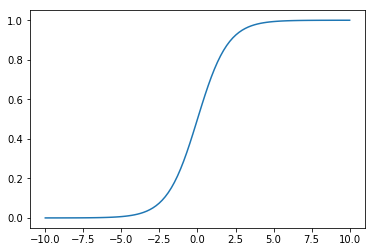

In [2]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-1 * x))


x = np.linspace(-10, 10, num=100)
plt.plot(x, sigmoid(x))
plt.show()

## How do they fit together?
Now you are probably like, "okay, so we began with a line, then x was originally a single value, then it became multi-dimensional input, then we talked about some matrix multiplications and sigmoid function. At this moment, you are most likely feeling:

![sowhat](sowhat.gif)


Let's head over to [TensorFlow Playground](http://playground.tensorflow.org)

## Forward Propagation

Let's imagine that we have a neural network with NO hidden layer. Let's say our input is an array of four elements, they represent `height`, `weight`, `fur_length`, and `fat ratio` of a dog. The output of the neural network would be a dog breed classification based on your input. For sake of simplicity, let's assume that there are only 3 breeds in the provided data.

Input:
$$
\vec{x} = [x_{0}, x_{1}, x_{2}, x_{3}]
$$

Weights:
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2}
\end{vmatrix}
$$

The input is of shape `(1, 4)` and the weight matrix is of shape `(4, 3)`. The matrix product of them is of shape `(1, 3)`, which represent the score for each classification. 

$$
y_{score} = [y_{0}, y_{1}, y_{2}]
$$

In [3]:
# Let's say you have multiple dog inputs, cause you want to do a batch of classification
dog_input_1 = [20, 10, 4, 0.90] # Completely bullshit data
dog_input_2 = [21, 5, 3, 0.50]

inputs = np.array([dog_input_1, dog_input_2])

print inputs.shape

W = np.random.randn(4, 3)

print W.shape

output = np.dot(inputs, W)
act = sigmoid(output)

print act

(2, 4)
(4, 3)
[[9.99999993e-01 1.00000000e+00 7.69848568e-03]
 [1.00000000e+00 1.00000000e+00 1.54759272e-04]]


Let's get fancy and do multiple hidden layers; let's try two!

Input:
$$
\vec{x} = [x_{0}, x_{1}, x_{2}, x_{3}]
$$

First weight matrix is of shape `(4, 4)` 
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} & w_{0, 3} \\
w_{1,0} & w_{1, 1} & w_{1, 2} & w_{1, 3} \\
w_{2,0} & w_{2, 1} & w_{2, 2} & w_{2, 3} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2} & w_{3, 3}
\end{vmatrix}
$$

Second weight matrix is of shape `(4, 3)`
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2}
\end{vmatrix}
$$

Third weight matrix is of shape `(3, 3)`
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2}
\end{vmatrix}
$$





In [4]:
W1 = np.random.randn(4, 4)
W2 = np.random.randn(4, 3)
W3 = np.random.randn(3, 3)

layer_1_output = np.dot(inputs, W1)
layer_1_act = sigmoid(layer_1_output)

print "Layer 1 output has shape %s" % str(layer_1_act.shape)

layer_2_output = np.dot(layer_1_act, W2)
layer_2_act = sigmoid(layer_2_output)

print "Layer 2 output has shape %s" % str(layer_2_act.shape)

layer_3_output = np.dot(layer_2_act, W3)
layer_3_act = sigmoid(layer_3_output)

print "Layer 3 output has shape %s" % str(layer_3_act.shape)

print "Final output:"
print layer_3_act

Layer 1 output has shape (2, 4)
Layer 2 output has shape (2, 3)
Layer 3 output has shape (2, 3)
Final output:
[[0.33002431 0.70960988 0.27586594]
 [0.25604023 0.69855638 0.27129749]]
